In [3]:
import mysql.connector as sql
from mysql.connector import Error
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
import pandas as pd
import numpy as np

In [7]:
mydb = sql.connect(
    host="localhost",
    user="root",
    passwd="rafid12002057",
    use_pure=True,  
    database="taxiii"
)
print(mydb)

In [9]:
mycursor=mydb.cursor()

In [125]:
mycursor.execute("SELECT * FROM avg_distance")
# Fetch data
data = mycursor.fetchall()

In [127]:
for i in mycursor:
    print(i)

In [129]:
vehicle_types = [row[0] for row in data]
average_distances = [float(row[1]) for row in data]  # Convert Decimal to float

In [131]:
print(data)

[('Car', Decimal('34.4257')), ('CNG', Decimal('34.5140')), ('Bike', Decimal('34.5340')), ('Auto-Rickshaw', Decimal('34.5712'))]


In [133]:
data = {'Vehicle Type': vehicle_types, 'Average Distance': average_distances}
df = pd.DataFrame(data)

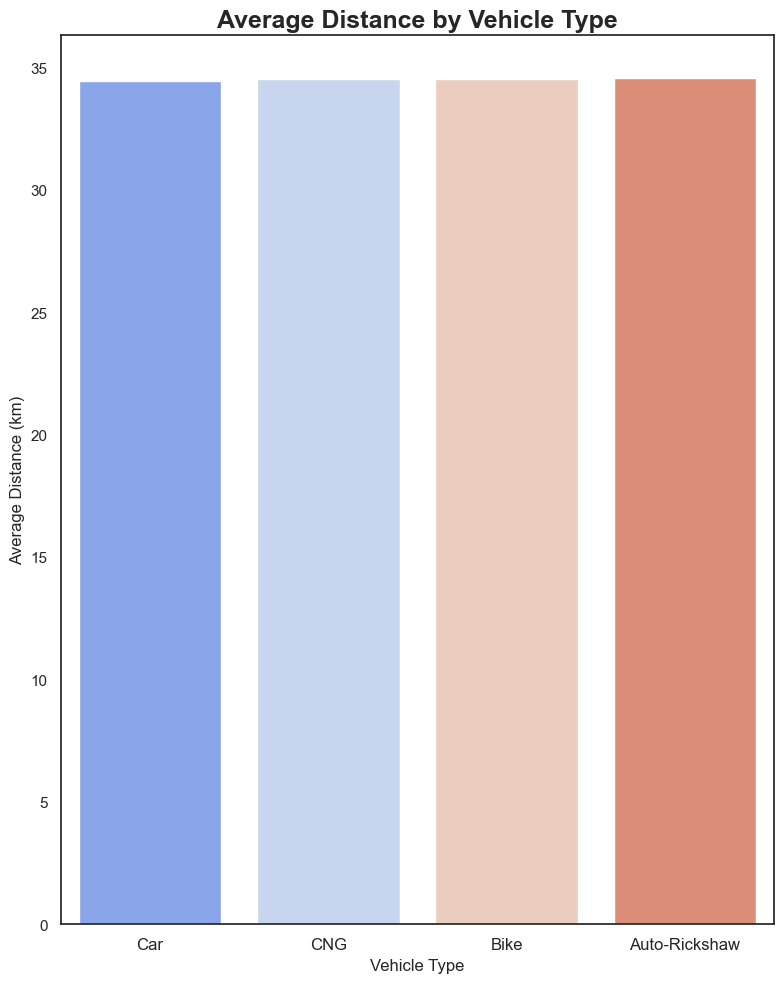

In [135]:
sns.set_theme(style="white")

# Create the bar plot
plt.figure(figsize=(8, 10))
sns.barplot(
    x='Vehicle Type',
    y='Average Distance',
    data=df,
    palette="coolwarm",
    hue='Vehicle Type',  # Assign x to hue
    dodge=False          # Prevent stacking (default behavior of hue)
)
plt.legend([], [], frameon=False)  # Hide legend if not needed

# Add titles and labels
plt.title("Average Distance by Vehicle Type", fontsize=18, weight='bold')
plt.xlabel("Vehicle Type", fontsize=12)
plt.ylabel("Average Distance (km)", fontsize=12)
plt.xticks(fontsize=12)
plt.tight_layout()

plt.savefig("avg_distance_premium_plot_with_values.png", dpi=300)
plt.show()

In [29]:
mycursor.execute("SELECT * FROM Cancellation_Counts")
# Fetch data
Cancellation_Count = mycursor.fetchall()

In [31]:
for d in mycursor:
    print(d)

In [33]:
Cancellation_Reason = [row[0] for row in Cancellation_Count]
Total_Cancellation = [float(row[1]) for row in Cancellation_Count]  # Convert Decimal to float

In [35]:
print(Cancellation_Count)

[('High fare', 16915), ('Change of plans', 16691), ('Others', 33534)]


In [37]:
data2 = {'Cancellation Reason': Cancellation_Reason, 'Total Cancellation': Total_Cancellation}
df2 = pd.DataFrame(data2)

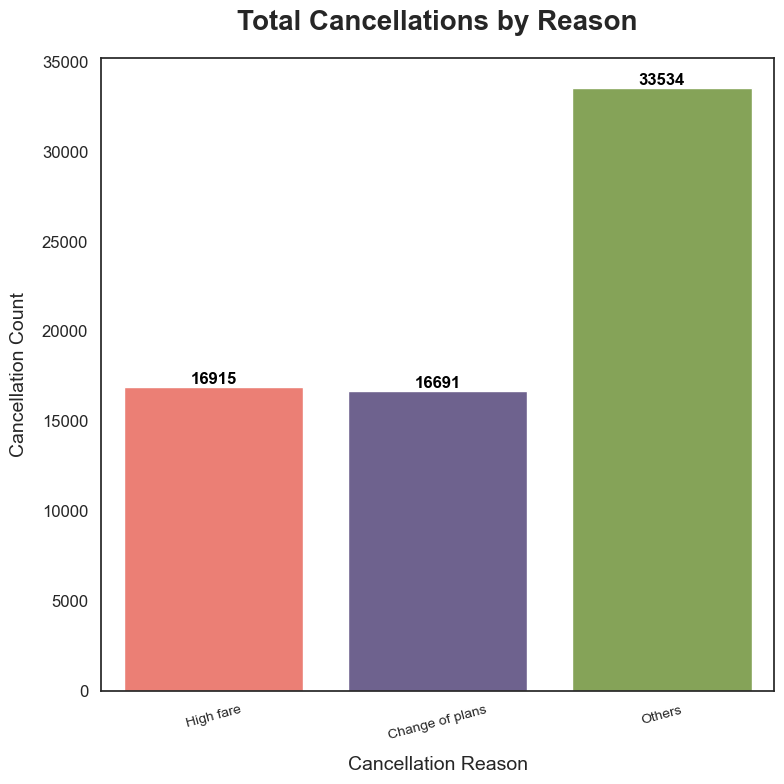

In [81]:
# Set a clean and professional theme
sns.set_theme(style="white")

# Create the bar plot
plt.figure(figsize=(8, 8))
sns.barplot(
    x='Cancellation Reason',
    y='Total Cancellation',
    data=df2,
    hue='Cancellation Reason',  # Explicitly assign hue
    dodge=False,
    palette=['#FF6F61', '#6B5B95', '#88B04B'],  # Refined vibrant color palette
)

# Disable the legend since the x-axis already provides the information
plt.legend([], [], frameon=False)

# Annotate bar values
for i, bar in enumerate(plt.gca().patches):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.5,
        f'{int(bar.get_height())}',
        ha='center', va='bottom',
        fontsize=12, color='black', weight='bold'
    )

# Add titles and labels
plt.title("Total Cancellations by Reason", fontsize=20, weight='bold', pad=20)
plt.xlabel("Cancellation Reason", fontsize=14, labelpad=10)
plt.ylabel("Cancellation Count", fontsize=14, labelpad=10)
plt.xticks(fontsize=10, rotation=15)
plt.yticks(fontsize=12)
plt.tight_layout()

# Save the plot
plt.savefig("cancellation_count_business_plot.png", dpi=300)
plt.show()

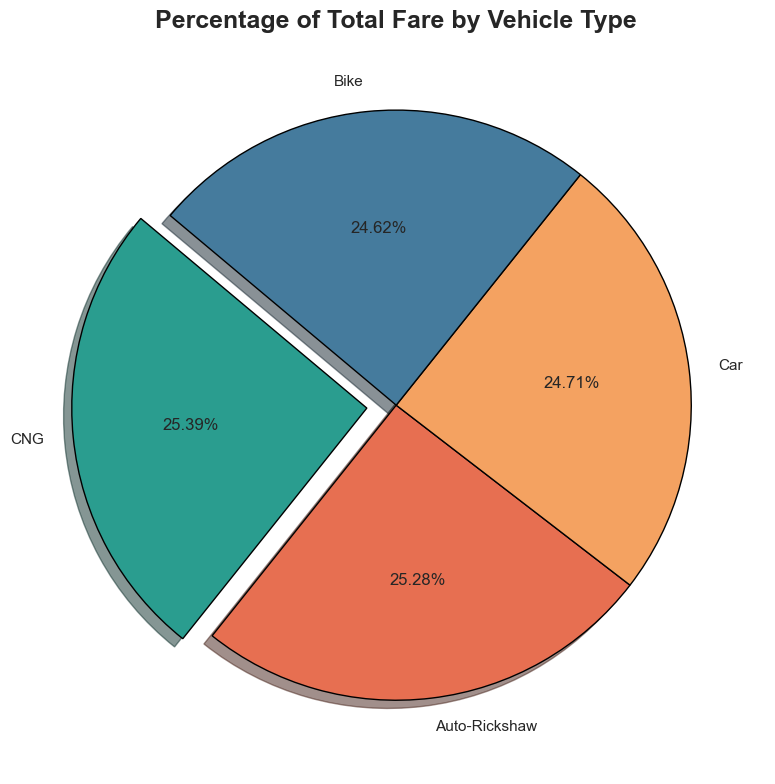

In [63]:
mycursor.execute("SELECT Vehicle_Type, Total_Fare FROM Percentage_Fare")
data3 = mycursor.fetchall()

# Separate data into two lists
vehicle_types = [row[0] for row in data3]
percentages = [float(row[1]) for row in data3]  # Ensure numeric values for plotting

# Create a professional pie chart
plt.figure(figsize=(8, 8))
colors = ['#2A9D8F', '#E76F51', '#F4A261', '#457B9D']  # Business-like color palette
explode = [0.1, 0, 0, 0]  # Highlight the first slice (e.g., CNG)

# Plot the pie chart
plt.pie(
    percentages,
    labels=vehicle_types,
    autopct='%1.2f%%',  # Show percentages with 2 decimal places
    startangle=140,     # Start angle for better visualization
    colors=colors,
    explode=explode,    # Highlight the first slice
    shadow=True,        # Add shadow for a 3D effect
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}  # Enhance slice edges
)

# Add a title
plt.title("Percentage of Total Fare by Vehicle Type", fontsize=18, weight='bold')
plt.tight_layout()
plt.savefig("percentage_fare_pie_chart.png", dpi=300)
plt.show()